In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{mathptmx}"

A_even = [80, 82, 84, 86, 88, 90, 92, 94, 96, 98]                           # Even nucleon numbers
A_odd = [79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]                        # Odd nucleon
Even_ticks = ['$^{80}$Zn', '$^{82}$Ge', '$^{84}$Se', '$^{86}$Kr', '$^{88}$Sr', '$^{90}$Zr', '$^{92}$Mo', '$^{94}$Ru', '$^{96}$Pd', '$^{98}$Cd']
Odd_ticks = ['$^{79}$Cu', '$^{81}$Ga', '$^{83}$As', '$^{85}$Br', '$^{87}$Rb', '$^{89}$Y', '$^{91}$Nb', '$^{93}$Tc', '$^{95}$Rh', '$^{97}$Ag', '$^{99}$In']
odd_J = [9/2, 5/2, 3/2, 5/2, 5/2, 9/2, 9/2, 3/2, 9/2, 9/2, 1/2]
mu_exp = np.array([2.20, 4.12, 2.75131, 2.44, -0.1374154, 6.37, 2.5, 6.259, 3.0, 10.84, 6.521, -0.101, 8.14, 10.82, 12.4, 2.3, 11.30, 13.9, 6.32, 10.46, 10.97])
mu_err = [0.1, 0.56, 0.00012, 0.22, 0.0000003, 0.04, 0.4, 0.13, 0.2, 0.06, 0.002, 0.002, 0.13, 0.14, 0.9, 0.3, 0.05, 0.3, 0.06, 0.05, 0.06]
#mu_th = [2.65676, 4.25305, 2.76323, 2.27189, -0.02839, 6.63283, 2.79427, 6.58524, 3.87149, 11.7607, 6.7089, -0.03349, 8.8197, 11.7316, 2.93701, 11.9339, 6.72065, 11.5445, 11.98071]
mu_i2 = np.array([2.55363, 4.19264, 2.79494, 2.18893, -0.19209, 6.25816, 2.63659, 6.02755, 3.47423, 11.0681, 6.3401, -0.19309, 8.1221, 10.8966, 14.3721, 2.78082, 11.2834, 14.37821, 6.35768, 10.7095, 11.32552])
mu_i3 = np.array([2.60744, 4.31895, 2.86865, 2.21135, -0.19059, 6.26402, 2.65452, 6.03318, 3.53988, 11.0962, 6.3460, -0.19593, 8.1272, 10.9103, 14.4305, 2.79203, 11.2928, 14.39864, 6.35768, 10.7277, 11.32552])
mu_i2_odd = [1.32900, 1.35724, 1.36501, 3.25468, 2.79494, -0.19209, 6.34012, 6.35768, 6.36354, 6.37525, 6.37525]
mu_i2_8plus = [11.06812, 11.28340, 11.30680, 11.32552, 11.33488]
mu_i3_odd = [1.32900, 1.33888, 1.35936, 3.30145, 2.86865, -0.19059, 6.34598, 6.35768, 6.36939, 6.37525, 6.37525]
mu_i3_8plus = [11.09620, 11.29276, 11.31148, 11.32552, 11.33488]

# Q1 calculated with e_p = 1.8e, Q2 calculated with e_p = 2e
# consider Q3 with e_p = 1.72e
Qexp = np.array([13.2, -43, -51, -25, -35])
Q_err = [0.9, 6, 3, 3, 2]
Q2 = [20.45, -45.13, -61.37, -30.28, -39.79]
Q1 = [0.9*Q2[i] for i in range(len(Q2))]
Qfree = [0.5*Q2[i] for i in range(len(Q2))]
Q_i2 = [17.88, -41.07, -55.63, -27.55, -36.26]
Q_i2_free = [Q_i2[i]/1.8 for i in range(len(Q_i2))]
Q_i3 = np.array([17.63, -40.37, -54.49, -27.42, -36.27])
Q_i3_free = np.array([Q_i3[i]/1.8 for i in range(len(Q_i3))])
Q_i2_odd = [-18.91, -3.07, 17.13, -1.87, 17.88, 0.00, -27.55, -12.37, 2.11, 17.10, 32.12]
Q_i2_8plus = [-55.63, -36.26, -9.73, 16.98, 42.59]
Q_i3_odd = [-18.91, -2.72, 16.37, -3.39, 17.63, 0.00, -27.42, -12.34, 2.12, 17.02, 32.12]
Q_i3_8plus = [-54.49, -36.27, -9.85, 16.74, 42.59]

BE2_exp = [730, 1210, 1050, 1060, 903, 627, 975]                           # Experimental BE2 for first 0+ -> 2+ transitions for 80Zn - 92Mo
BE2_err_top = [90, 150, 150, 100, 32, 34, 43]
BE2_err_bot = [90, 150, 150, 100, 23, 34, 43]
BE2_th1 = [617, 938, 987, 987, 916, 590, 967, 1240, 1166, 755]             # Calculations for same transitions using e_p = 1.8e, values after 996 correspond to 94Ru, 96Pd, and 98Cd 
BE2_th2 = [620, 954, 990, 967, 919, 584, 970, 1245, 1172, 760]             # Calculations for same transitions using e_p = 2e, values after 1230 correspond to 94Ru, 96Pd, and 98Cd 
BE2_JW = [620, 918, 1185, 833, 691, 561, 1097, 1334, 1235, 809]            # Ji and Wildenthal calculations for first 0+ -> 2+ transitions (e_p = 2.0e)
BE2_02_i2 = [620, 954, 990, 967, 919, 584, 970]
BE2_02_i3 = [617, 938, 987, 987, 916, 590, 967]


BE2_86_i2 = [81.97, 32.1, 2.315, 4.448, 47.34]
BE2_86_i3 = [82.28, 32.51, 2.11, 5.198, 47.34]
BE2_86_jj44a = [56.13, 32.73, 1.977, 5.429, 47.34]
BE2_86_JW = [39.92, 28.96, 0.7317, 7.405, 47.34]
BE2_86_exp = [57.74, 32.342, 0.1193, 9.40, 38.38]
BE2_86_error = [1.68, 0.543, 0.0076, 1.04, 4.03]
# 94Rb only has J values of 6 and 8+
# M = sqrt[B(E2)]
M_exp = np.array([math.sqrt(BE2_exp[i]) for i in range(len(BE2_exp))])
M_err_top = [0.5*BE2_err_top[i]*math.pow(BE2_exp[i], -0.5) for i in range(len(BE2_exp))]
M_err_bot = [0.5*BE2_err_bot[i]*math.pow(BE2_exp[i], -0.5) for i in range(len(BE2_exp))]
M_i2 = [math.sqrt(BE2_02_i2[i]) for i in range(len(BE2_02_i2))]
M_i3 = np.array([math.sqrt(BE2_02_i3[i]) for i in range(len(BE2_02_i3))])
M_free_i2 = [M_i2[i]/1.8 for i in range(len(M_i2))]
M_free_i3 = np.array([M_i3[i]/1.8 for i in range(len(M_i3))])
x = np.linspace(-65, 38)

In [2]:
# This cell is concerned only with extracting B(E2, 0 -> 2) for even-even nuclei
# Get the list of all files and directories
path = "E://rsh-nushellx//n50deo/jw"
dir_list = os.listdir(path)
#print("Files and directories in '", path, "' :")
# prints all files
#print(dir_list)
BE2_JW = np.empty(len(A_even))           # Ji and Wildenthal calculations for first 0+ -> 2+ transitions (e_p = 1.8e)
for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            content = file.readlines()
            # Check to see if nucleus is even-even
            if content[16].split()[1] == '0':
                #print(int(content[3].split()[5]))
                #print(filename.split('j.deo')[0] + ": ", float(content[19].split()[8]))
                for i in range(len(A_even)):
                    if int(content[3].split()[5]) == A_even[i]:
                        BE2_JW[i] = float(content[19].split()[8])
#print(BE2_JW)


In [3]:
# Get the list of all files and directories
path = "E://rsh-nushellx//n50deo/jj44a"
dir_list = os.listdir(path)
#print("Files and directories in '", path, "' :")
# prints all files
#print(dir_list)
BE2_jj44a = np.empty(len(A_even))        # jj44a calculations for first 0+ -> 2+ transitions (e_p = 1.8e)
for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            content = file.readlines()
            # Check to see if nucleus is even-even
            if content[16].split()[1] == '0':
                #print(int(content[3].split()[5]))
                #print(filename.split('j.deo')[0] + ": ", float(content[19].split()[8]))
                for i in range(len(A_even)):
                    if int(content[3].split()[5]) == A_even[i]:
                        BE2_jj44a[i] = float(content[19].split()[8])
#print(BE2_jj44a)

In [4]:
# Get the list of all files and directories
num_nuclei = 21
main_path = "E://rsh-nushellx//n50deo"
main_list = os.listdir(main_path)                               # List of all interaction sub-directories in main deo file
del main_list[0], main_list[2]                                 # Removes path to directories without desired data (change for your particular main directory)

# Collection of all ground state dipole and quadrupole moments for all nuclei in all interaction calculations
# The first index gives the interaction
# The second index gives the nucleus in question ranging from 79Cu to 99In in this case.

all_A = []
odd_A = []
even_A = []
all_ticks = []
odd_ticks = []
even_ticks = []
m8_A = []
m8_ticks = []
m9_A = [89]
m9_ticks = ['$^{89}$Y']

all_dipoles = np.empty([len(main_list), num_nuclei])                          # All ground state dipole moments
all_mu8 = np.empty([len(main_list), num_nuclei])                              # All dipole moments for first 8+ states
all_Q = np.empty([len(main_list), num_nuclei])                                # All ground state quadrupole moments
all_Q8 = np.empty([len(main_list), num_nuclei])                               # All quadrupole moments for first 8+ states

odd_mu9 = np.empty([len(main_list), 6])
odd_Q9 = np.empty([len(main_list), 6])
odd_mu9[0][0] = 6.23475
odd_mu9[1][0] = 6.19377
odd_mu9[2][0] = 6.25816
odd_mu9[3][0] = 6.26402
odd_Q9[0][0] = -37.91
odd_Q9[1][0] = -33.67
odd_Q9[2][0] = -41.07
odd_Q9[3][0] = -40.37

print("Relevant files and directories in", main_path, ":")
print(main_list)

for i in range(len(main_list)):                              
    interaction_path = os.path.join(main_path, main_list[i])                  # Creates a path to a given interaction (adds subdirectory name to main path)
    nucleus_list = os.listdir(interaction_path)                               # List of all files within this interaction 
    nucleus_index = 0                                                         # Index for storing appropriate values in all_moments in second array index
    #print("Files and directories in '", interaction_path, "' :")

    if i == 0:
        for j in range(num_nuclei):
            all_A.append(nucleus_list[j][2:4])
            all_ticks.append('$^{'+ f'{nucleus_list[j][2:4]}' + '}$' + nucleus_list[j][:2].capitalize())
            all_ticks[j] = all_ticks[j].replace("_", "")                      # Deletes all occurrences of '_'
            if int(nucleus_list[j][2:4]) % 2 == 0:
                even_A.append(int(nucleus_list[j][2:4]))
                even_ticks.append(all_ticks[j])
            else:
                odd_A.append(int(nucleus_list[j][2:4]))
                odd_ticks.append(all_ticks[j])

    for nucleus in nucleus_list:
        deo_path = os.path.join(interaction_path, nucleus)                    # Path to a particular nucleus .deo file in a given interaction
        with open(deo_path, 'r') as file:
                data = file.readlines()
                all_dipoles[i][nucleus_index] = data[16][55:64]               # dipole moment data in column range 56-64
                all_Q[i][nucleus_index] = data[16][68:75]                     # Quadrupole moment data in column range 68-75
                for j in range(16, len(data)):
                    if data[j][12:13] == '8'  and data[j][15] == '+' and data[j][20] == '1':
                        all_mu8[i][nucleus_index] = data[j][55:64]
                        all_Q8[i][nucleus_index] = data[j][68:75]
        nucleus_index += 1   

odd_dipoles = np.empty([len(main_list), len(odd_A)])
even_dipoles = np.empty([len(main_list), len(even_A)])
odd_Q = np.empty([len(main_list), len(odd_A)])
even_Q = np.empty([len(main_list), len(even_A)])
even_mu8 = np.empty([len(main_list), len(even_A)-5])                          # -5 because we only want to plot 8+ states for A >= 90
even_Q8 = np.empty([len(main_list), len(even_A)-5])                 
for i in range(len(main_list)):
    even_index = 0
    odd_index = 0
    m8_index = 0
    m9_index = 1
    for j in range(num_nuclei):
        if int(all_A[j]) % 2 == 0:
            even_dipoles[i][even_index] = all_dipoles[i][j]
            even_Q[i][even_index] = all_Q[i][j]
            if int(all_A[j]) >= 90:
                if i == 0:
                    m8_ticks.append(all_ticks[j])
                    m8_A.append(int(all_A[j]))
                even_Q8[i][m8_index] = all_Q8[i][j]
                even_mu8[i][m8_index] = all_mu8[i][j]
                m8_index += 1
            even_index += 1
        else:
            odd_dipoles[i][odd_index] = all_dipoles[i][j]
            odd_Q[i][odd_index] = all_Q[i][j]
            if int(all_A[j]) > 89:
                if i == 0:
                    m9_ticks.append(all_ticks[j])
                    m9_A.append(int(all_A[j]))
                odd_mu9[i][m9_index] = all_dipoles[i][j]
                odd_Q9[i][m9_index] = all_Q[i][j]
                m9_index += 1
            odd_index += 1

Relevant files and directories in E://rsh-nushellx//n50deo :
['jj44a', 'jw', 'p35i2', 'p35i3']


In [5]:
print(odd_ticks)
print(odd_dipoles[1])
print(odd_Q[1])


['$^{97}$Ag', '$^{83}$As', '$^{85}$Br', '$^{79}$Cu', '$^{81}$Ga', '$^{99}$In', '$^{91}$Nb', '$^{87}$Rb', '$^{95}$Rh', '$^{93}$Tc', '$^{89}$Y']
[ 6.37525  1.31276  3.13578  1.329    0.68375  6.37525  6.34598  3.10328
  6.36939  6.35768 -0.17663]
[ 17.68  16.95  -8.23 -18.91  10.72  32.12 -24.39  14.15   4.07  -9.31
   0.  ]


In [6]:
odd_dipoles[0][1] = 1.48718
odd_Q[0][1] = 4.20
odd_dipoles[1][4] = 1.3297
odd_Q[1][4] = -1.27

In [7]:
print(odd_mu9[3])
print(even_mu8[3])
print(len(odd_mu9[3]))
A90 = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
A90_ticks = ['$^{90}$Zr', '$^{91}$Nb', '$^{92}$Mo', '$^{93}$Tc', '$^{94}$Ru',  '$^{95}$Rh','$^{96}$Pd', '$^{97}$Ag', '$^{98}$Cd', '$^{99}$In']
A90_mu = [11.09620, 6.34598, 11.29276, 6.35768, 11.31148, 6.36939, 11.32552, 6.37525, 11.33488, 6.37525]
A90_exp = [10.84, 6.521, 11.30, 6.32, 10.97]
A90_exp_J = [8, 9/2, 8, 9/2, 8]
A90_err = [0.06, 0.002, 0.05, 0.06, 0.06]

[6.26402 6.37525 6.37525 6.34598 6.36939 6.35768]
[11.33488 11.29276 11.32552 11.31148 11.0962 ]
6


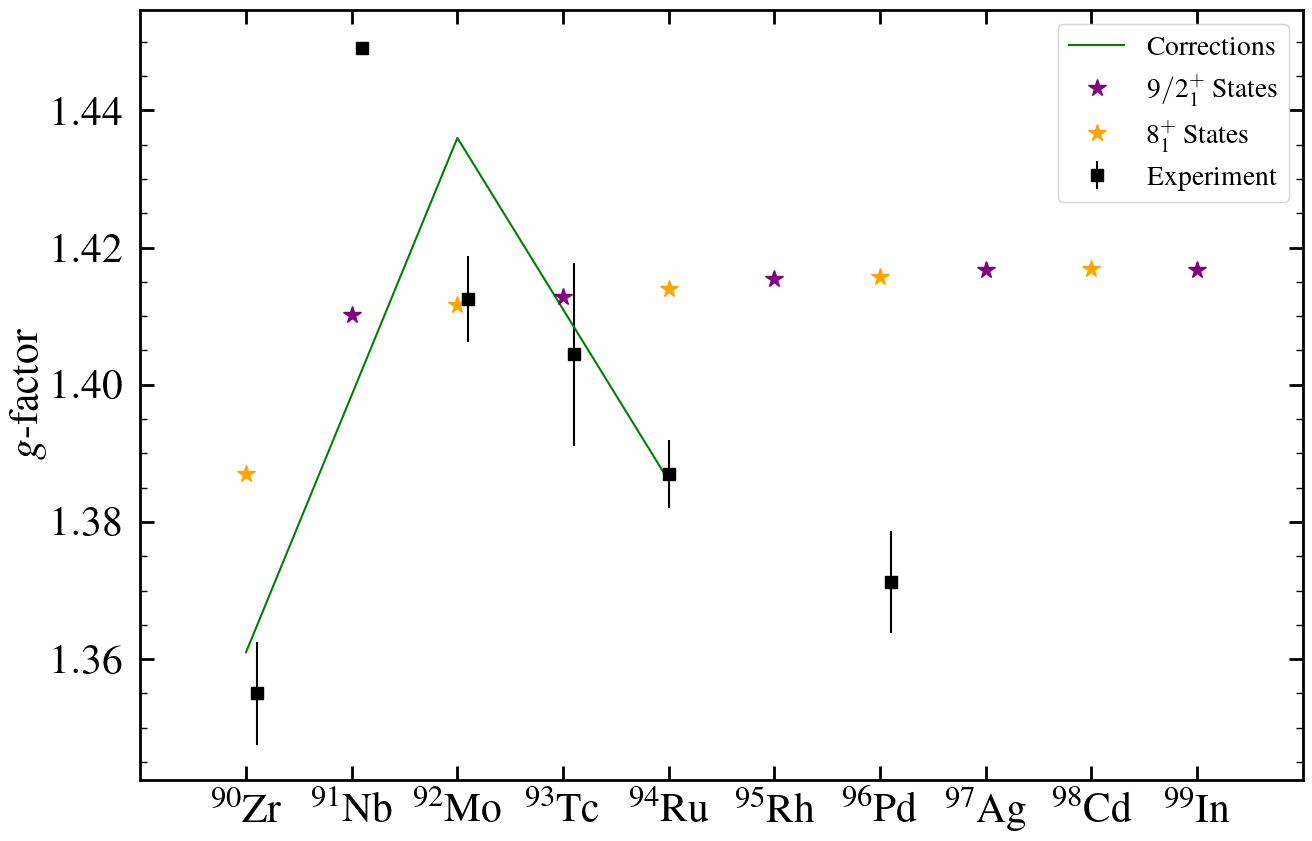

In [21]:
f, ax = plt.subplots()
f.set_figwidth(15)
f.set_figheight(10)

plt.setp(ax, xticks= A90, xticklabels=A90_ticks)
#ax.errorbar([A90[int(2*i+1)] for i in range(5)], [A90_mu[2*i+1]/4.5 for i in range(5)], yerr=[0.08/4.5, 0.08/4.5, 0.08/4.5, 0.08/4.5, 0.08/4.5], 
                    #fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13,label='$9/2^+_1$ States')
#ax.errorbar([A90[int(2*i)] for i in range(5)], [A90_mu[2*i]/8 for i in range(5)], yerr=[0.08/8, 0.08/(8), 0.08/(8), 0.08/(8), 0.08/(8)], 
                    #fmt='*', mfc='orange', mec='orange', ecolor='orange', ms=13, label='$8^+_1$ States')
ax.errorbar([A90[int(2*i+1)] for i in range(5)], [A90_mu[2*i+1]/4.5 for i in range(5)], 
                    fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13,label='$9/2^+_1$ States')
ax.errorbar([A90[int(2*i)] for i in range(5)], [A90_mu[2*i]/8 for i in range(5)],
                    fmt='*', mfc='orange', mec='orange', ecolor='orange', ms=13, label='$8^+_1$ States')
plt.errorbar([90+0.1,91+0.1,92+0.1,93+0.1,96+0.1], [A90_exp[i]/A90_exp_J[i] for i in range(len(A90_exp))], yerr=[A90_err[i]/A90_exp_J[i] for i in range(len(A90_exp))], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')
plt.errorbar(94, 1.387, yerr=0.005, fmt='s', mfc='black', mec='black', ecolor='black', ms=8)
plt.plot([90,92,94], [1.361, 1.436, 1.386],color='green' ,label='Corrections')
ax.set_ylabel('$g$-factor', fontsize=30)
plt.xlim(89,100)
#plt.ylim(1.35,1.45)
plt.tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=30, pad=10)
plt.tick_params(which="minor", direction="in", right=True, top=False, bottom=False, length=5, width=1, labelsize=20)
ax.xaxis.get_major_ticks()[7].set_pad(4.5) 
plt.legend(fontsize=20)
plt.minorticks_on()
plt.show()

<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:72: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:72: SyntaxWarning: invalid escape sequence '\m'
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\1311180185.py:71: SyntaxWarning: invalid escape sequence '\m'
  ax[0][0].set_ylabel('$\mathrm{\mu(\mu_{N})}$', labelpad=30, fontsize=30)
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\1311180185.py:72: SyntaxWarning: invalid escape sequence '\m'
  ax[1][0].set_ylabel('$\mathrm{Q(e \cdot fm^2)}$', fontsize=30)


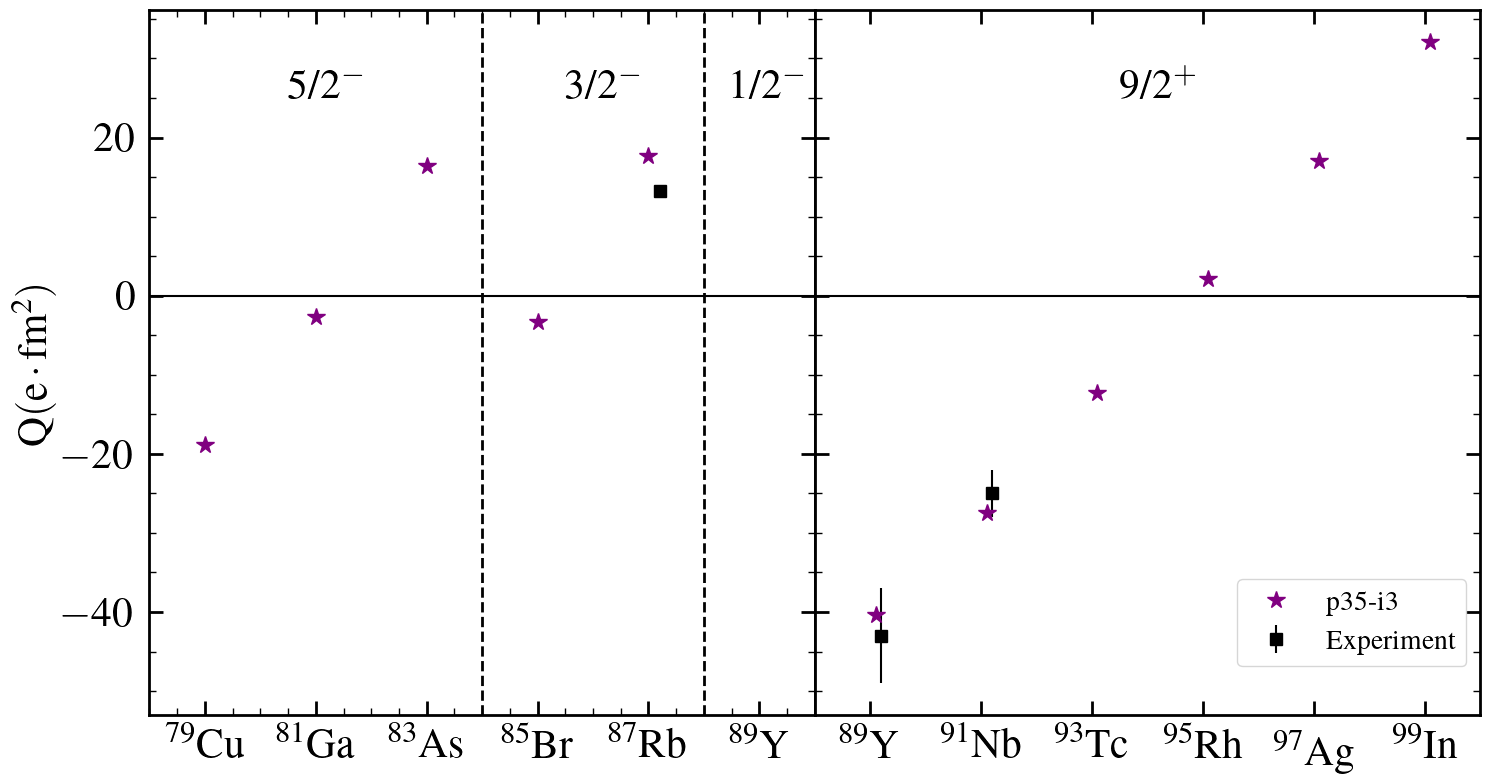

In [24]:
#f, ax = plt.subplots(2,2, sharey='row', gridspec_kw={'width_ratios':[6,6]})
f, ax = plt.subplots(2,2, sharex='col', sharey='row', gridspec_kw={'width_ratios':[6,6]})      # Switch to this one to isolate bottom plot
f.set_figwidth(15)
f.set_figheight(15)

plt.setp(ax[1][0], xticks=odd_A, xticklabels=odd_ticks)                 # Change first index to isolate top/bottom plot
plt.setp(ax[1][1], xticks=m9_A, xticklabels=m9_ticks)                   # ""
ax[0][0].tick_params(pad=10)
ax[0][1].tick_params(pad=10)
ax[0][0].set_xlim(78, 90)
ax[0][1].set_xlim(88, 100)

ax[0][0].plot(xodd, np.zeros(len(xodd)), color='black', linestyle='solid')
ax[1][0].plot(xodd, np.zeros(len(xodd)), color='black', linestyle='solid')
ax[0][1].plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')
ax[1][1].plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')


#ax[0][0].scatter([odd_A[i] - 0.2 for i in range(len(odd_A))], odd_dipoles[0], color='green', s = 125, label='jj44a', alpha=0.9)
#ax[0][0].scatter([odd_A[i] for i in range(len(odd_A))], odd_dipoles[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[0][0].scatter([odd_A[i] - 0.1 for i in range(len(odd_A))], odd_dipoles[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
#ax[0][0].errorbar([odd_A[i] + 0.1 for i in range(len(odd_A))], odd_dipoles[3], yerr=[0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.22, 0.08], 
                   # fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[0][0].errorbar([odd_A[i] + 0.1 for i in range(len(odd_A))], odd_dipoles[3], 
                    fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[0][0].errorbar([87 + 0.2, 89 + 0.2, 91 + 0.2], [2.75131, -0.1374154, 6.521], yerr=[0.00012, 0.0000003, 0.002], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

# the :10 for odd_Q is to not include the Q values for 89Y, which has no quadrupole moment in the 1/2 state
#ax[1][0].scatter([odd_A[i] - 0.2 for i in range(len(odd_A)-1)], odd_Q[0][:10], color='green', s = 125, label='jj44a', alpha=0.9)
#ax[1][0].scatter([odd_A[i] for i in range(len(odd_A)-1)], odd_Q[1][:10], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[1][0].scatter(odd_A[:10], odd_Q[2][:10], color='orange', s = 125, label='p35-i2', alpha=0.9)
#ax[1][0].errorbar(odd_A[:10], odd_Q[3][:10], yerr=[5, 5, 5, 5, 5, 5, 5, 5, 5, 5], 
                    #fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[1][0].errorbar(odd_A[:10], odd_Q[3][:10],
                    fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[1][0].errorbar([87 + 0.2, 91 + 0.2], [13.2, -25], yerr=[0.1, 3], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

#ax[0][1].scatter([m9_A[i] - 0.2 for i in range(len(m9_A))], odd_mu9[0], color='green', s = 125, label='jj44a', alpha=0.9)
#ax[0][1].scatter([m9_A[i] for i in range(len(m9_A))], odd_mu9[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[0][1].scatter([m9_A[i] - 0.1 for i in range(len(m9_A))], odd_mu9[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
#ax[0][1].errorbar([m9_A[i] + 0.1 for i in range(len(m9_A))], odd_mu9[3], yerr=[0.08, 0.08, 0.08, 0.08, 0.08, 0.08], 
                   # fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13,label='p35-i3')
ax[0][1].errorbar([m9_A[i] + 0.1 for i in range(len(m9_A))], odd_mu9[3], 
                    fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13,label='p35-i3')
ax[0][1].errorbar([89 + 0.2, 91 + 0.2, 93 + 0.2], [6.37, 6.521, 6.32], yerr=[0.04, 0.002, 0.06], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

#ax[1][1].scatter([m9_A[i] - 0.2 for i in range(len(m9_A))], odd_Q9[0], color='green', s = 125, label='jj44a', alpha=0.9)
#ax[1][1].scatter([m9_A[i]  for i in range(len(m9_A))], odd_Q9[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[1][1].scatter([m9_A[i] - 0.1 for i in range(len(m9_A))], odd_Q9[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
#ax[1][1].errorbar([m9_A[i] + 0.1 for i in range(len(m9_A))], odd_Q9[3], yerr=[1.4, 1.4, 1.4, 1.4, 1.4, 1.4], 
                    #fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[1][1].errorbar([m9_A[i] + 0.1 for i in range(len(m9_A))], odd_Q9[3], 
                    fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[1][1].errorbar([89 + 0.2, 91 + 0.2], [-43, -25], yerr=[6, 3], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

ax[0][0].tick_params(axis="both", which="major", direction="in", left=True, right=True, top=True, length=10, width=2, labelsize=30)
ax[0][0].tick_params(axis="both", which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=30)
ax[1][0].tick_params(axis="both", which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=30, pad=10)
ax[1][0].tick_params(axis="both", which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=30)

ax[0][1].tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=30)
ax[0][1].tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=30)
ax[1][1].tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=30, pad=10)
ax[1][1].tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=30)
ax[0][1].xaxis.get_major_ticks()[1].set_pad(5)       # This adjust only the 97Ag label because it's behaving badly

ax[0][0].set_ylabel('$\mathrm{\mu(\mu_{N})}$', labelpad=30, fontsize=30)
ax[1][0].set_ylabel('$\mathrm{Q(e \cdot fm^2)}$', fontsize=30)

ax[0][0].axvline(x = 84, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[0][0].axvline(x = 88, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[0][0].axvline(x = 90, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[1][0].axvline(x = 84, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[1][0].axvline(x = 88, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[1][0].axvline(x = 90, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')

ax[1][0].text(80.5, 25, '5/2$^{-}$', fontsize = 30)          # Switch first index to isolate top/bottom plot
ax[1][0].text(85.5, 25, '3/2$^{-}$', fontsize = 30)          # ""
ax[1][0].text(88.5, 25, '1/2$^{-}$', fontsize = 30)          # ""
ax[1][1].text(93.5, 25, '9/2$^{+}$', fontsize = 30)          # ""

ax[0][0].set_visible(False)                # Option for isolating subplot
ax[0][1].set_visible(False) 


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
ax[0][0].minorticks_on()
ax[1][0].minorticks_on()
ax[1][1].legend(fontsize=20, bbox_to_anchor=(1, 0.05), loc="lower right").set_alpha(1)          # Toggle first index to isolate top/bottom plot
plt.show()

In [11]:
mu_i3_6plus = [8.31391, 8.46106, 8.47682, 8.49259, 8.50310]
print(even_mu8)

[[11.33488 11.28808 11.32552 11.31148 11.02132]
 [11.33488 11.29276 11.33488 11.32084 10.85284]
 [11.33488 11.2834  11.32552 11.3068  11.06812]
 [11.33488 11.29276 11.32552 11.31148 11.0962 ]]


<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\1865330055.py:43: SyntaxWarning: invalid escape sequence '\m'
  ax[0][0].set_ylabel('$\mathrm{\mu(\mu_{N})}$', labelpad=25, fontsize=30)
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\1865330055.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[1][0].set_ylabel('$\mathrm{Q(e \cdot fm^2)}$', fontsize=30)


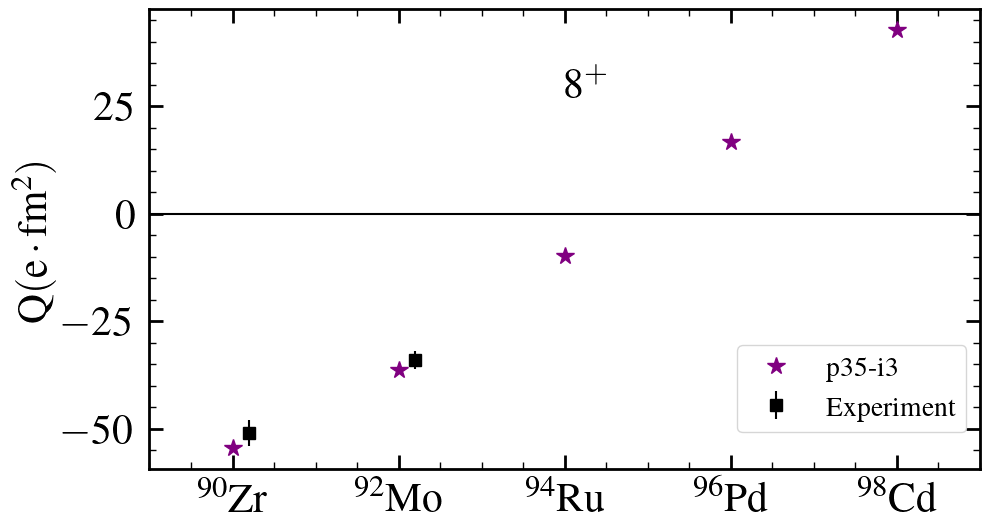

In [29]:
f, ax = plt.subplots(2,1, sharex='col', sharey='row', gridspec_kw={'width_ratios':[6]}, squeeze=False)
#f, ax = plt.subplots(2,1, sharey='row', gridspec_kw={'width_ratios':[6]}, squeeze=False)     # Use this for isolating subplots
f.set_figwidth(10)
f.set_figheight(10)

plt.setp(ax[1][0], xticks=m8_A, xticklabels=m8_ticks)

xodd = [i for i in range(A_odd[0]-1, A_odd[len(A_odd)-1]+2)]
xeven = [i for i in range(A_even[0]-1, A_even[len(A_even)-1]+3)]
ax[0][0].set_xlim(89,99)
ax[0][0].plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')
ax[1][0].plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')

#ax[0][0].scatter([m8_A[i] - 0.2 for i in range(len(m8_A))], even_mu8[0], color='green', s = 125, label='jj44a', alpha=0.9)
#ax[0][0].scatter([m8_A[i] for i in range(len(m8_A))], even_mu8[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[0][0].scatter([m8_A[i] - 0.1 for i in range(len(m8_A))], even_mu8[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
#ax[0][0].errorbar([m8_A[i] + 0.1 for i in range(len(m8_A))], even_mu8[3], yerr=[0.08, 0.08, 0.08, 0.08, 0.08], 
                    #fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[0][0].errorbar([m8_A[i] + 0.1 for i in range(len(m8_A))], even_mu8[3], 
                    fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[0][0].errorbar([90 + 0.2, 92 + 0.2, 94 + 0.2, 96 + 0.2], [10.84, 11.30, 1.387*8, 10.97], yerr=[0.06, 0.05, 0.005*8, 0.06], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

#ax[0][0].scatter([m8_A[i] + 0.1 for i in range(len(m8_A))], mu_i3_6plus, color='purple', marker='*', s = 135, label='p35-i3')

#ax[1][0].scatter([m8_A[i] - 0.2 for i in range(len(m8_A))], even_Q8[0], color='green', s = 125, label='jj44a', alpha=0.9)
#ax[1][0].scatter([m8_A[i]  for i in range(len(m8_A))], even_Q8[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[1][0].scatter([m8_A[i] - 0.1 for i in range(len(m8_A))], even_Q8[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
#ax[1][0].errorbar([m8_A[i] + 0.1 for i in range(len(m8_A))], even_Q8[3], yerr=[1.4, 1.4, 1.4, 1.4, 1.4], 
                    #fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[1][0].errorbar([m8_A[i] for i in range(len(m8_A))], even_Q8[3],
                    fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=13, label='p35-i3')
ax[1][0].errorbar([90 + 0.2, 92 + 0.2], [-51, -34], yerr=[3, 2], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

ax[0][0].tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=30)
ax[0][0].tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=30)
ax[1][0].tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=30, pad = 10)
ax[1][0].tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=30)

ax[0][0].set_visible(False)                # Option for isolating subplot

ax[0][0].set_ylabel('$\mathrm{\mu(\mu_{N})}$', labelpad=25, fontsize=30)
ax[1][0].set_ylabel('$\mathrm{Q(e \cdot fm^2)}$', fontsize=30)

ax[1][0].text(94, 27, '8$^{+}$', fontsize = 30)
ax[1][0].legend(fontsize=20, bbox_to_anchor=(1, 0.05), loc="lower right").set_alpha(1)

ax[0][0].tick_params(pad=10)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
ax[0][0].minorticks_on()
ax[1][0].minorticks_on()
plt.show()

<>:82: SyntaxWarning: invalid escape sequence '\m'
<>:83: SyntaxWarning: invalid escape sequence '\m'
<>:82: SyntaxWarning: invalid escape sequence '\m'
<>:83: SyntaxWarning: invalid escape sequence '\m'
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\2516726661.py:82: SyntaxWarning: invalid escape sequence '\m'
  ax[0][0].set_ylabel('$\mathrm{\mu(\mu_{N})}$', labelpad=25)
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\2516726661.py:83: SyntaxWarning: invalid escape sequence '\m'
  ax[1][0].set_ylabel('$\mathrm{Q(e \cdot fm^2)}$')


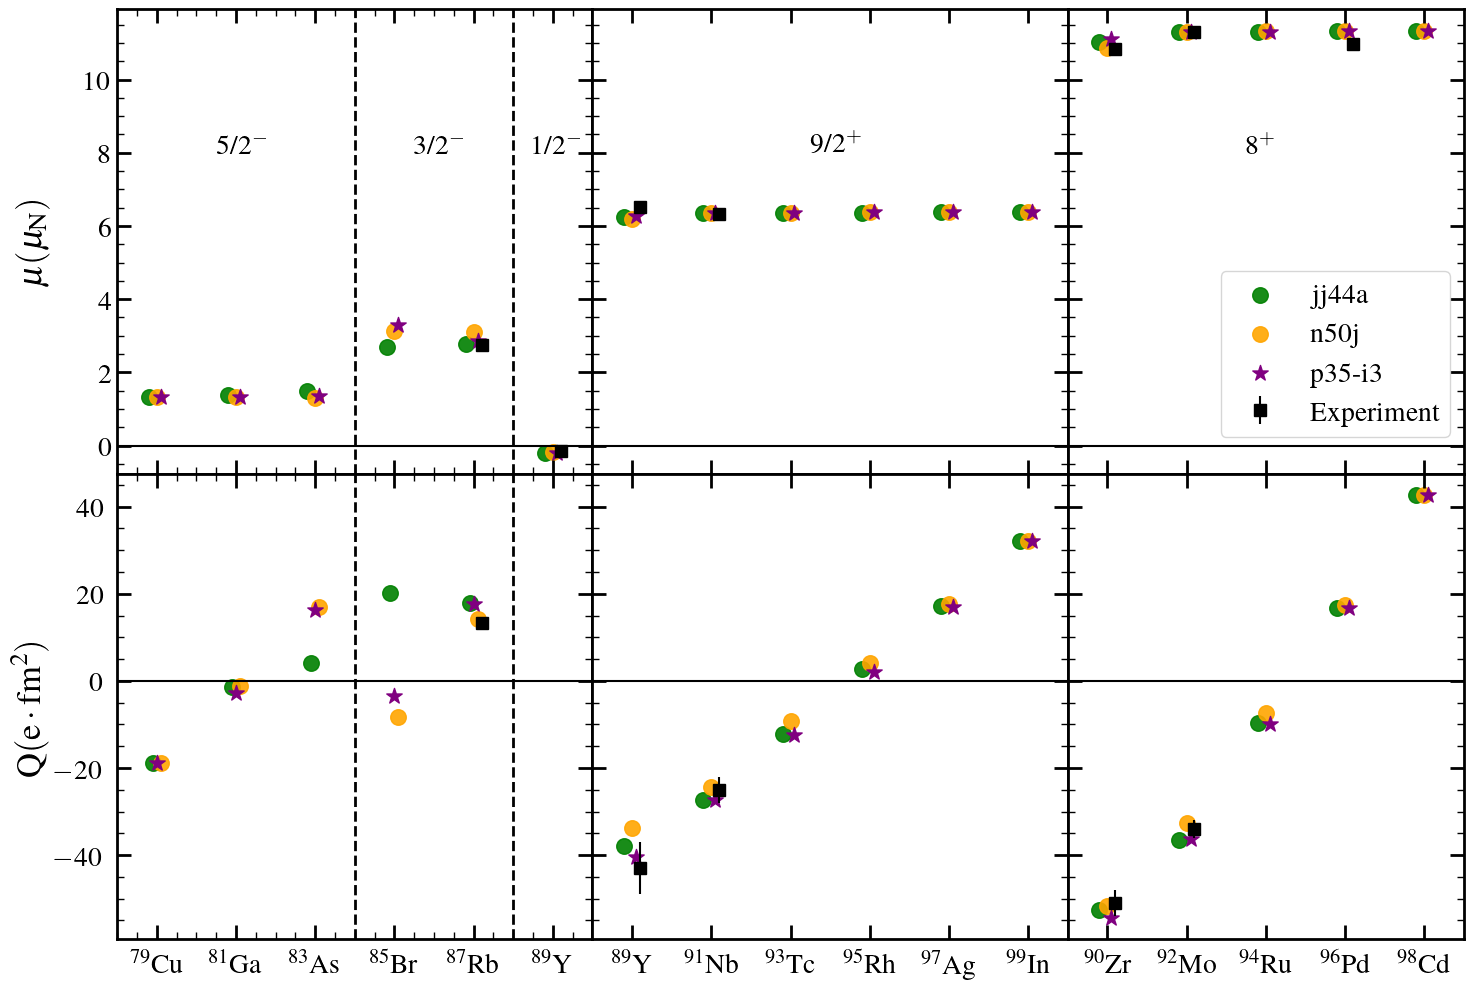

In [13]:
f, ax = plt.subplots(2,3, sharex='col', sharey='row', gridspec_kw={'width_ratios':[6,6,5]})
f.set_figwidth(15)
f.set_figheight(10)

plt.setp(ax[0][0], xticks=odd_A, xticklabels=odd_ticks)
plt.setp(ax[0][1], xticks=m9_A, xticklabels=m9_ticks)
plt.setp(ax[0][2], xticks=m8_A, xticklabels=m8_ticks)

xodd = [i for i in range(A_odd[0]-1, A_odd[len(A_odd)-1]+2)]
xeven = [i for i in range(A_even[0]-1, A_even[len(A_even)-1]+3)]
ax[0][0].set_xlim(78, 90)
ax[0][1].set_xlim(88, 100)
ax[0][2].set_xlim(89,99)

ax[0][0].plot(xodd, np.zeros(len(xodd)), color='black', linestyle='solid')
ax[1][0].plot(xodd, np.zeros(len(xodd)), color='black', linestyle='solid')
ax[0][1].plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')
ax[1][1].plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')
ax[0][2].plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')
ax[1][2].plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')


ax[0][0].scatter([odd_A[i] - 0.2 for i in range(len(odd_A))], odd_dipoles[0], color='green', s = 125, label='jj44a', alpha=0.9)
ax[0][0].scatter([odd_A[i] for i in range(len(odd_A))], odd_dipoles[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[0][0].scatter([odd_A[i] - 0.1 for i in range(len(odd_A))], odd_dipoles[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
ax[0][0].scatter([odd_A[i] + 0.1 for i in range(len(odd_A))], odd_dipoles[3], color='purple', marker='*', s = 135, label='p35-i3')
ax[0][0].errorbar([87 + 0.2 , 89 + 0.2, 91 + 0.2], [2.75131, -0.1374154, 6.521], yerr=[0.00012, 0.0000003, 0.002], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

# the :10 for odd_Q is to not include the Q values for 89Y, which has no quadrupole moment in the 1/2 state
ax[1][0].scatter([odd_A[i] - 0.1 for i in range(len(odd_A)-1)], odd_Q[0][:10], color='green', s = 125, label='jj44a', alpha=0.9)
ax[1][0].scatter([odd_A[i] + 0.1 for i in range(len(odd_A)-1)], odd_Q[1][:10], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[1][0].scatter(odd_A[:10], odd_Q[2][:10], color='orange', s = 125, label='p35-i2', alpha=0.9)
ax[1][0].scatter(odd_A[:10], odd_Q[3][:10], color='purple', marker='*', s = 135, label='p35-i3')
ax[1][0].errorbar([87 + 0.2, 91 + 0.2], [13.2, -25], yerr=[0.1, 3], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

ax[0][1].scatter([m9_A[i] - 0.2 for i in range(len(m9_A))], odd_mu9[0], color='green', s = 125, label='jj44a', alpha=0.9)
ax[0][1].scatter([m9_A[i] for i in range(len(m9_A))], odd_mu9[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[0][1].scatter([m9_A[i] - 0.1 for i in range(len(m9_A))], odd_mu9[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
ax[0][1].scatter([m9_A[i] + 0.1 for i in range(len(m9_A))], odd_mu9[3], color='purple', marker='*', s = 135, label='p35-i3')
ax[0][1].errorbar([87 + 0.2 , 89 + 0.2, 91 + 0.2], [6.37, 6.521, 6.32], yerr=[0.04, 0.002, 0.06], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

ax[0][2].scatter([m8_A[i] - 0.2 for i in range(len(m8_A))], even_mu8[0], color='green', s = 125, label='jj44a', alpha=0.9)
ax[0][2].scatter([m8_A[i] for i in range(len(m8_A))], even_mu8[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[0][2].scatter([m8_A[i] - 0.1 for i in range(len(m8_A))], even_mu8[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
ax[0][2].scatter([m8_A[i] + 0.1 for i in range(len(m8_A))], even_mu8[3], color='purple', marker='*', s = 135, label='p35-i3')
ax[0][2].errorbar([90 + 0.2, 92 + 0.2, 96 + 0.2], [10.84, 11.30, 10.97], yerr=[0.06, 0.05, 0.06], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

ax[1][1].scatter([m9_A[i] - 0.2 for i in range(len(m9_A))], odd_Q9[0], color='green', s = 125, label='jj44a', alpha=0.9)
ax[1][1].scatter([m9_A[i] for i in range(len(m9_A))], odd_Q9[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[1][1].scatter([m9_A[i] - 0.1 for i in range(len(m9_A))], odd_Q9[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
ax[1][1].scatter([m9_A[i] + 0.1 for i in range(len(m9_A))], odd_Q9[3], color='purple', marker='*', s = 135, label='p35-i3')
ax[1][1].errorbar([89 + 0.2, 91 + 0.2], [-43, -25], yerr=[6, 3], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

ax[1][2].scatter([m8_A[i] - 0.2 for i in range(len(m8_A))], even_Q8[0], color='green', s = 125, label='jj44a', alpha=0.9)
ax[1][2].scatter([m8_A[i] for i in range(len(m8_A))], even_Q8[1], color='orange',  s = 125, label='n50j', alpha=0.9)
#ax[1][2].scatter([m8_A[i] - 0.1 for i in range(len(m8_A))], even_Q8[2], color='orange', s = 125, label='p35-i2', alpha=0.9)
ax[1][2].scatter([m8_A[i] + 0.1 for i in range(len(m8_A))], even_Q8[3], color='purple', marker='*', s = 135, label='p35-i3')
ax[1][2].errorbar([90 + 0.2, 92 + 0.2], [-51, -34], yerr=[3, 2], 
                    fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')

ax[0][0].tick_params(axis="both", which="major", direction="in", left=True, right=True, top=True, length=10, width=2, labelsize=20)
ax[0][0].tick_params(axis="both", which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=20)
ax[1][0].tick_params(axis="both", which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=20, pad=10)
ax[1][0].tick_params(axis="both", which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=20)

ax[0][1].tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=20)
ax[0][1].tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=20)
ax[1][1].tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=20, pad=10)
ax[1][1].tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=20)
ax[1][1].xaxis.get_major_ticks()[1].set_pad(7)       # This adjust only the 97Ag label because it's behaving badly

ax[0][2].tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=20)
ax[0][2].tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=20)
ax[1][2].tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=20, pad = 10)
ax[1][2].tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=20)

ax[0][0].set_ylabel('$\mathrm{\mu(\mu_{N})}$', labelpad=25)
ax[1][0].set_ylabel('$\mathrm{Q(e \cdot fm^2)}$')

ax[0][0].axvline(x = 84, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[0][0].axvline(x = 88, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[0][0].axvline(x = 90, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[1][0].axvline(x = 84, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[1][0].axvline(x = 88, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')
ax[1][0].axvline(x = 90, ymin = 0, ymax = 7, color = 'k', linewidth=2, ls='--')

ax[0][0].text(80.5, 8, '5/2$^{-}$', fontsize = 20)
ax[0][0].text(85.5, 8, '3/2$^{-}$', fontsize = 20)
ax[0][0].text(88.5, 8, '1/2$^{-}$', fontsize = 20)
ax[0][1].text(93.5, 8, '9/2$^{+}$', fontsize = 20)
ax[0][2].text(93.5, 8, '8$^{+}$', fontsize = 20)
ax[0][2].legend(fontsize=20, bbox_to_anchor=(1, 0.05), loc="lower right").set_alpha(1)

plt.tick_params(axis='x', pad=10)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
ax[0][0].minorticks_on()
ax[1][0].minorticks_on()
plt.show()

In [14]:
print(BE2_86_i3)
print(BE2_86_exp)
print([math.pow((10-4*(i+1))/6, 2)*BE2_86_i3[0] for i in range(len(BE2_86_i3))])
print([math.pow((10-4*(i+1))/6, 2)*BE2_86_exp[0] for i in range(len(BE2_86_i3))])

[82.28, 32.51, 2.11, 5.198, 47.34]
[57.74, 32.342, 0.1193, 9.4, 38.38]
[82.28, 9.142222222222221, 9.142222222222221, 82.28, 228.5555555555556]
[57.74, 6.415555555555556, 6.415555555555556, 57.74, 160.3888888888889]


In [15]:
print(A_even)
print(BE2_86_i3)

[80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
[82.28, 32.51, 2.11, 5.198, 47.34]


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\3457991475.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('B(E2) $\mathrm{(e^2 \cdot fm^4)}$', fontsize=30)


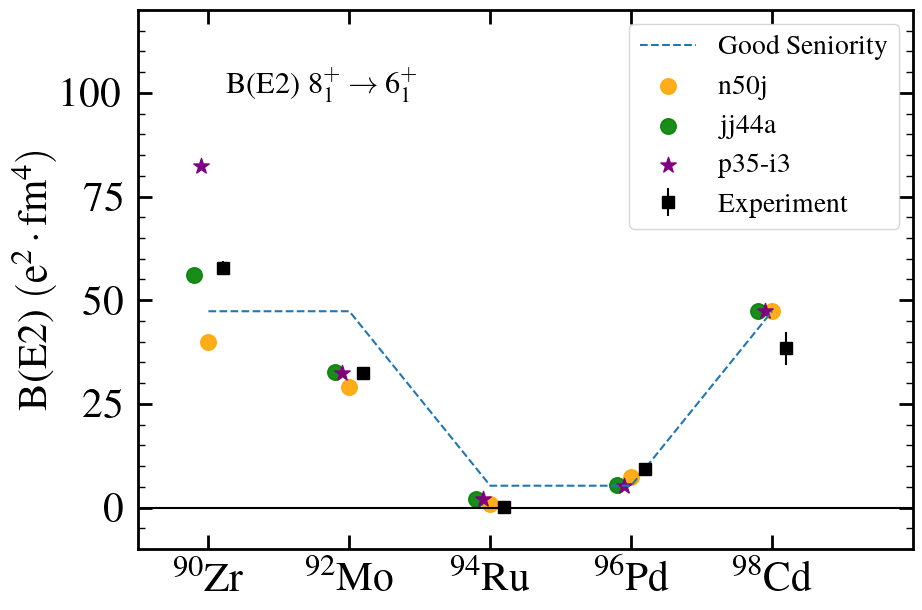

In [16]:
Good_Seniority = [math.pow((5-2*(i))/3, 2)*BE2_86_i3[4] for i in range(len(BE2_86_i3))]
Good_Seniority[0] = Good_Seniority[1]

plt.figure(figsize=(10,7))
plt.xticks(A_even, Even_ticks, fontsize=30)
plt.plot(xeven, np.zeros(len(xeven)), color='black', linestyle='solid')
plt.plot(A_even[5:], Good_Seniority, linestyle='dashed', label='Good Seniority')
plt.scatter([A_even[i]  for i in range(5,len(A_even))], BE2_86_JW, color='orange', s = 125, label='n50j', alpha=0.9)
plt.scatter([A_even[i] - 0.2 for i in range(5,len(A_even))], BE2_86_jj44a, color='green', s = 125, label='jj44a', alpha=0.9)
#plt.scatter([A_even[i] + 0.1 for i in range(5, len(A_even))], BE2_86_i2, color='orange', s = 125, label='p35-i2', alpha=0.9)
plt.scatter([A_even[i] - 0.1 for i in range(5,len(A_even))], BE2_86_i3, color='purple', marker='*', s = 135, label='p35-i3', alpha=1)
plt.errorbar(np.array(A_even[5:]) + np.array([0.2,0.2,0.2,0.2,0.2]) , BE2_86_exp, yerr=BE2_86_error, fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='Experiment')
plt.ylabel('B(E2) $\mathrm{(e^2 \cdot fm^4)}$', fontsize=30)
plt.tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=30, pad=10)
plt.tick_params(which="minor", direction="in", right=True, top=False, bottom=False, length=5, width=1, labelsize=20)
plt.text(90.25, 100, r'B(E2) $\mathdefault{8^+_1 \rightarrow 6^+_1}$', fontsize = 22)
plt.xlim(89,100)
plt.ylim(-10,120)
plt.legend(fontsize=20, loc='upper right')
plt.minorticks_on()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\559074203.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.text(10, -25, f'= {math.sqrt((np.linalg.norm(Qexp -Q_i3)**2+ np.linalg.norm(M_exp -M_i3)**2)/(Qexp.size+M_exp.size)):.3f} $e \cdot $fm$^2$', fontsize = 22)


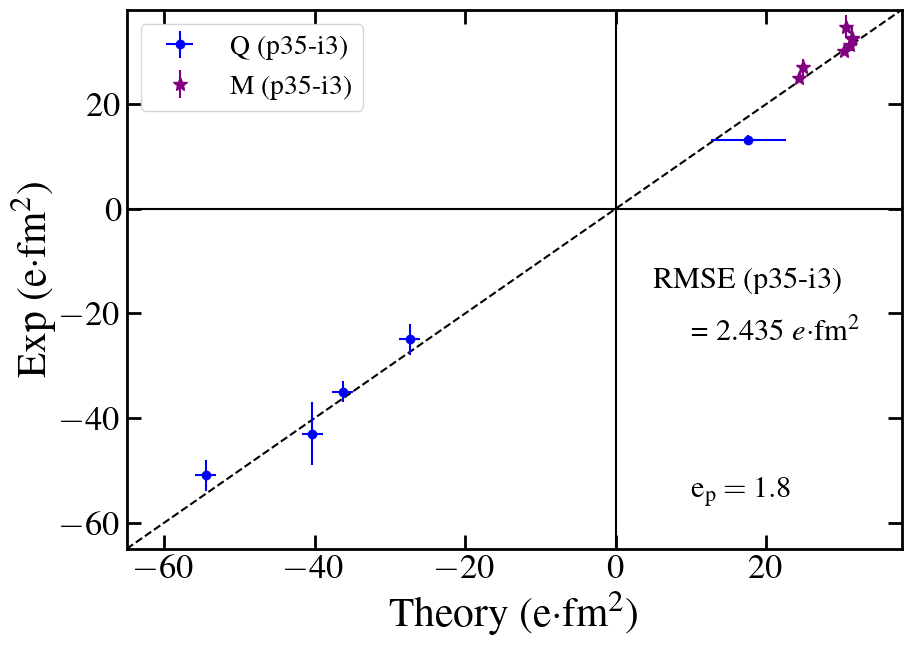

In [17]:
x = [i for i in range(-65,100)]
plt.figure(figsize=(10,7))
plt.plot(x, x, 'k--')
#plt.errorbar(Q_i2, Qexp, yerr=Q_err, fmt='o', mfc='orange', mec='orange', ecolor='orange', label='Q (p35-i2)')
plt.errorbar(Q_i3, Qexp, xerr=[5, 1.4, 1.4, 1.4, 1.4], yerr=Q_err, fmt='o', mfc='blue', mec='blue', ecolor='blue', label='Q (p35-i3)')
#plt.errorbar(M_i2, M_exp, yerr=(M_err_bot, M_err_top), fmt='*', mfc='purple', mec='red', ecolor='red', ms=10, label=r'M (p35-i2)')
plt.errorbar(M_i3, M_exp, yerr=(M_err_bot, M_err_top), fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=10, label=r'M (p35-i3)')
plt.vlines(0, -65, 38, colors='k')
plt.hlines(0, -65, 38, colors='k')
plt.xlim(-65, 38)
plt.ylim(-65, 38)
plt.xlabel(r'Theory (e$ \cdot $fm$^2$)', fontsize=30)
plt.ylabel(r'Exp (e$ \cdot $fm$^2$)', fontsize=30)
plt.tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=25)
plt.tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=25)
plt.text(5, -15, f'RMSE (p35-i3)', fontsize = 22)
plt.text(10, -25, f'= {math.sqrt((np.linalg.norm(Qexp -Q_i3)**2+ np.linalg.norm(M_exp -M_i3)**2)/(Qexp.size+M_exp.size)):.3f} $e \cdot $fm$^2$', fontsize = 22)
plt.text(10, -55, r'e$_{\mathrm{p}} = 1.8$', fontsize = 22)
plt.legend(fontsize=20)
plt.show()

In [18]:
print(mu_exp)

[ 2.2        4.12       2.75131    2.44      -0.1374154  6.37
  2.5        6.259      3.        10.84       6.521     -0.101
  8.14      10.82      12.4        2.3       11.3       13.9
  6.32      10.46      10.97     ]


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\2724742846.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.text(1, 11, f'RMSE (p35-i3) =  {math.sqrt(np.linalg.norm(mu_exp-mu_i3)**2/mu_exp.size):.3f} $\mu_N$', fontsize = 22)


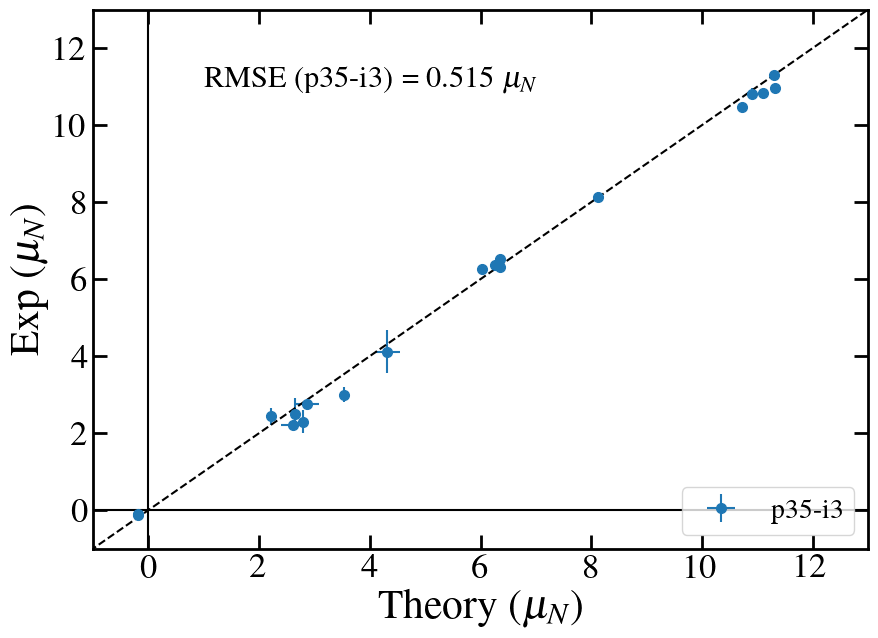

In [19]:
mu_err_th = [0.22, 0.22, 0.22, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
plt.figure(figsize=(10,7))
#plt.errorbar(mu_i2, mu_exp, yerr=mu_err, ms=7, fmt='o', label='p35-i2')
plt.errorbar(mu_i3, mu_exp, xerr=mu_err_th, yerr=mu_err, ms=7, fmt='o', label='p35-i3')
plt.plot(x, x, 'k--')
plt.vlines(0, -65, 38, colors='k')
plt.hlines(0, -65, 38, colors='k')
plt.xlim(-1, 13)
plt.ylim(-1, 13)
plt.xlabel(r'Theory ($\mathdefault{\mu_N}$)', fontsize=30)
plt.ylabel(r'Exp ($\mathdefault{\mu_N}$)', fontsize=30)
plt.text(1, 11, f'RMSE (p35-i3) =  {math.sqrt(np.linalg.norm(mu_exp-mu_i3)**2/mu_exp.size):.3f} $\mu_N$', fontsize = 22)
plt.tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=25)
plt.tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=25)
plt.legend(fontsize=20, loc='lower right')
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:46: SyntaxWarning: invalid escape sequence '\c'
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\1163930838.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.text(10, -25, f'= {math.sqrt((np.sum(Qexp -Q_i3_free)**2+ np.linalg.norm(M_exp -M_free_i3)**2)/(Qexp.size+M_exp.size)):.3f} $e \cdot $fm$^2$', fontsize = 22)
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\1163930838.py:46: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('B(E2) e$^2 \cdot $fm$^4$', fontsize=30)


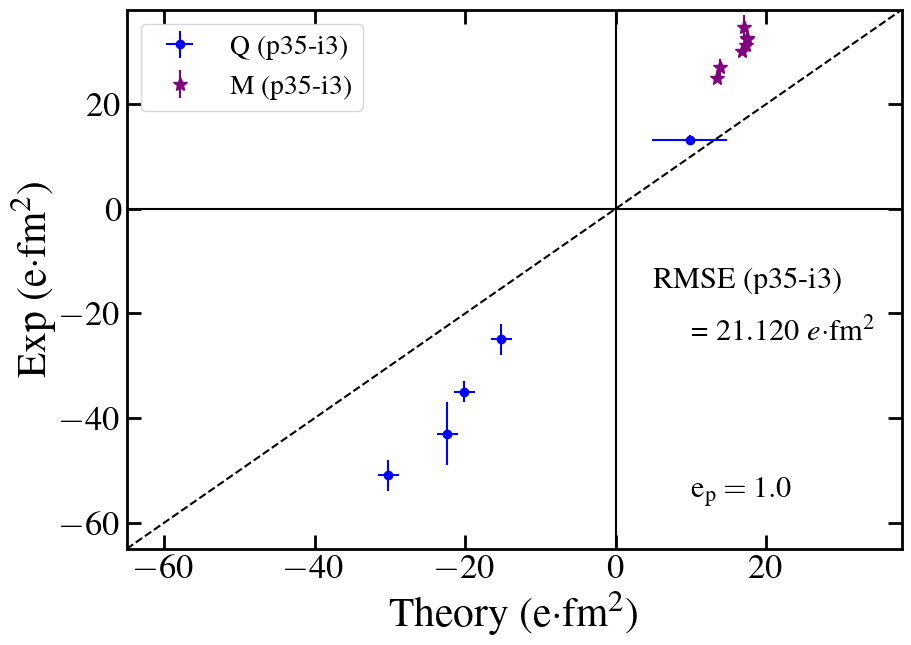

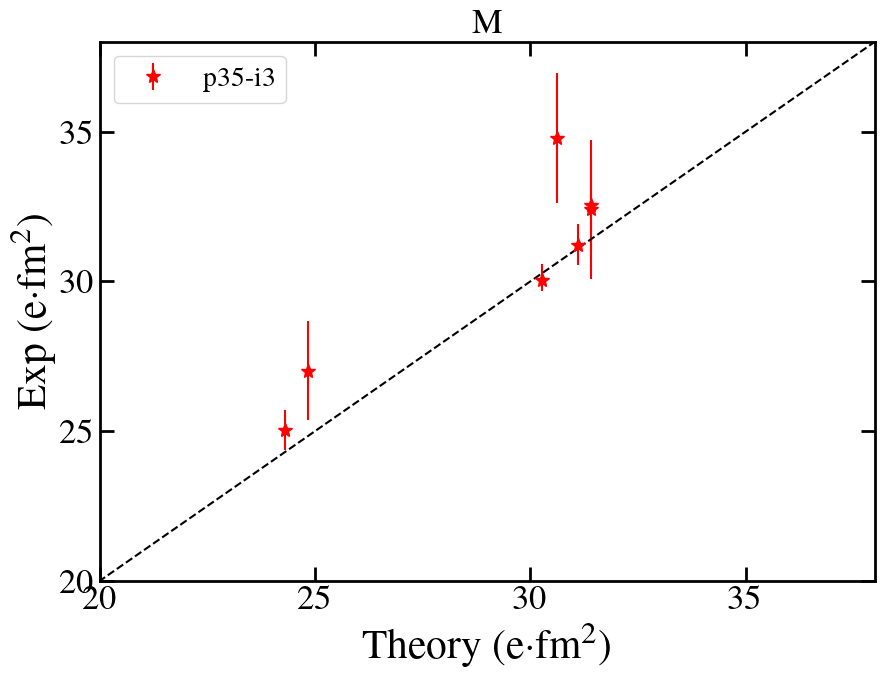

C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\1163930838.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(A_even, BE2_th1, 'ko-', label='p35-i3', color="purple", marker="*", markersize=10, zorder=3)
C:\Users\purcell\AppData\Local\Temp\ipykernel_7260\1163930838.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(A_even, BE2_th1, 'ko-', label='p35-i3', color="purple", marker="*", markersize=10, zorder=3)


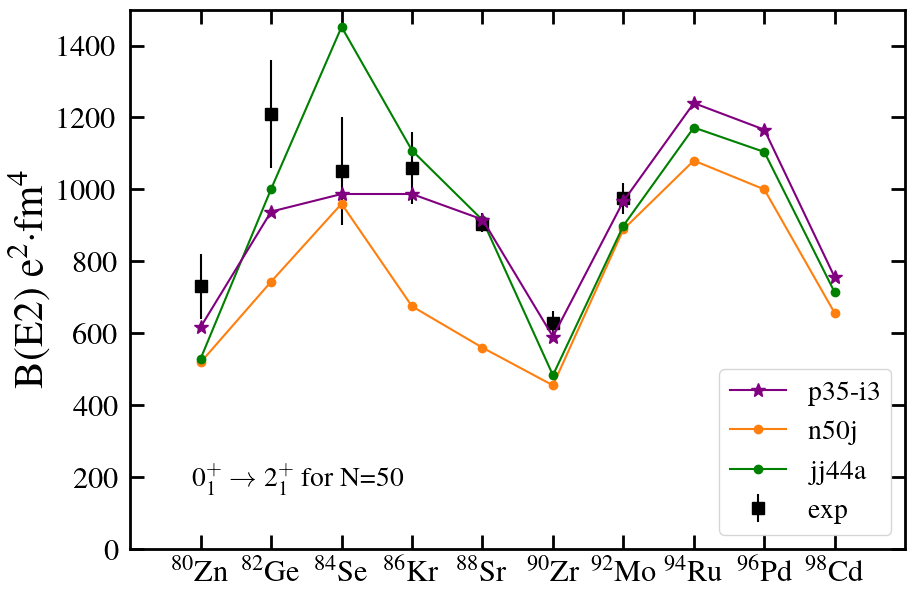

In [20]:
plt.figure(figsize=(10,7))
plt.plot(x, x, 'k--')
#plt.errorbar(Q_i2_free, Qexp, yerr=Q_err, fmt='o', mfc='orange', mec='orange', ecolor='orange', label='Q (p35-i2)')
plt.errorbar(Q_i3_free, Qexp, xerr=[5, 1.4, 1.4, 1.4, 1.4], yerr=Q_err, fmt='o', mfc='blue', mec='blue', ecolor='blue', label='Q (p35-i3)')
#plt.errorbar(M_free_i2, M_exp, yerr=(M_err_bot, M_err_top), fmt='*', mfc='red', mec='red', ecolor='purple', ms=10, label=r'M (p35-i2)')
plt.errorbar(M_free_i3, M_exp, yerr=(M_err_bot, M_err_top), fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=10, label=r'M (p35-i3)')
plt.vlines(0, -65, 38, colors='k')
plt.hlines(0, -65, 38, colors='k')
plt.xlim(-65, 38)
plt.ylim(-65, 38)
plt.xlabel(r'Theory (e$ \cdot $fm$^2$)', fontsize=30)
plt.ylabel(r'Exp (e$ \cdot $fm$^2$)', fontsize=30)
plt.tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=25)
plt.tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=25)
plt.text(5, -15, f'RMSE (p35-i3)', fontsize = 22)
#plt.text(10, -25, f'= {math.sqrt((np.linalg.norm(Qexp -Q_i3_free)+ np.linalg.norm(M_exp -M_free_i3))/(Qexp.size+M_exp.size)):.3f} $e \cdot $fm$^2$', fontsize = 22)
plt.text(10, -25, f'= {math.sqrt((np.sum(Qexp -Q_i3_free)**2+ np.linalg.norm(M_exp -M_free_i3)**2)/(Qexp.size+M_exp.size)):.3f} $e \cdot $fm$^2$', fontsize = 22)
plt.text(10, -55, r'e$_{\mathrm{p}} = 1.0$', fontsize = 22)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(10,7))
#plt.errorbar(M_i2, M_exp, yerr=(M_err_bot, M_err_top), fmt='*', mfc='purple', mec='purple', ecolor='purple', ms=10, label='p35-i2')
plt.errorbar(M_i3, M_exp, yerr=(M_err_bot, M_err_top), fmt='*', mfc='red', mec='red', ecolor='red', ms=10, label='p35-i3')
plt.plot(x, x, 'k--')
plt.xlim(20, 38)
plt.ylim(20, 38)
plt.xlabel(r'Theory (e$ \cdot $fm$^2$)', fontsize=30)
plt.ylabel(r'Exp (e$ \cdot $fm$^2$)', fontsize=30)
plt.tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, labelsize=25)
plt.tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=25)
plt.title(r'M', fontsize=25)
plt.legend(fontsize=20)
plt.show()

fig4 = plt.figure(figsize=(10,7))
ax4 = fig4.add_subplot()
plt.errorbar(A_even[:7], BE2_exp, yerr=(BE2_err_bot, BE2_err_top), fmt='s', mfc='black', mec='black', ecolor='black', ms=8, label='exp')
plt.plot(A_even, BE2_th1, 'ko-', label='p35-i3', color="purple", marker="*", markersize=10, zorder=3)
#plt.plot(A_even, BE2_th2, '-o', label='p35-i2')
plt.plot(A_even, BE2_JW, '-o', label='n50j')
plt.plot(A_even, BE2_jj44a, 'go-', label='jj44a')
plt.xlim(78, 100)
plt.ylim(0, 1500)
plt.xticks(A_even, Even_ticks)
plt.ylabel('B(E2) e$^2 \cdot $fm$^4$', fontsize=30)
plt.tick_params(which="major", direction="in", right=True, top=True, length=10, width=2, pad=8, labelsize=22)
plt.tick_params(which="minor", direction="in", right=True, top=True, length=5, width=1, labelsize=25)
plt.legend(fontsize=20, loc='lower right')
ax4.text(0.08, 0.1, r'0$^+_1$ $\rightarrow$ 2$^+_1$ for N=50',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax4.transAxes,
        color='black', fontsize=20)
plt.show()